# A Preliminary Analysis on BART GTFS data on 02/12/2018

In [231]:
# Modules and Libraries to be used in this project
import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
from collections import Counter
from bokeh.plotting import figure, show
from bokeh.resources import CDN
from bokeh.io import output_notebook

In [232]:
# Read the following csv files
trips = pd.read_csv('trips.txt')
st = pd.read_csv('stop_times.txt')
routes = pd.read_csv('routes.txt')
stops = pd.read_csv('stops.txt')
stop_times = pd.read_csv('stop_times.txt')

In [233]:
# trips.head(20)
stops.head()
# routes.head(10)

,stop_id,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,12TH,12th St. Oakland City Center,NaN,37.803768,-122.271450,12TH,http://www.bart.gov/stations/12TH/,0,NaN,NaN,1
1,16TH,16th St. Mission,NaN,37.765062,-122.419694,16TH,http://www.bart.gov/stations/16TH/,0,NaN,NaN,1
2,19TH,19th St. Oakland,NaN,37.808350,-122.268602,19TH,http://www.bart.gov/stations/19TH/,0,NaN,NaN,1
3,19TH_N,19th St. Oakland,NaN,37.808350,-122.268602,19TH,http://www.bart.gov/stations/19TH/,0,NaN,NaN,1
4,24TH,24th St. Mission,NaN,37.752470,-122.418143,24TH,http://www.bart.gov/stations/24TH/,0,NaN,NaN,1


In [234]:
# We could do a simple merge, collectiong columns from stop_times and trips
pd.merge(trips,st[['trip_id','stop_id','arrival_time']])

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed,stop_id,arrival_time
0,1,WKDY,3610403WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,PITT,04:03:00
1,1,WKDY,3610403WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,NCON,04:09:00
2,1,WKDY,3610403WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,CONC,04:13:00
3,1,WKDY,3610403WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,PHIL,04:18:00
4,1,WKDY,3610403WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,WCRK,04:21:00
5,1,WKDY,3610403WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,LAFY,04:25:00
6,1,WKDY,3610403WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,ORIN,04:30:00
7,1,WKDY,3610403WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,ROCK,04:36:00
8,1,WKDY,3610403WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,MCAR_S,04:39:00
9,1,WKDY,3610403WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,19TH,04:43:00


In [235]:
# DO a double merge to give us the stop_name as well.
stops_by_route = pd.merge(pd.merge(trips,st[['trip_id','stop_id','arrival_time']]),stops[['stop_id','stop_name']])
stops_by_route

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed,stop_id,arrival_time,stop_name
0,1,WKDY,3610403WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,PITT,04:03:00,Pittsburg/Bay Point
1,1,WKDY,3630418WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,PITT,04:18:00,Pittsburg/Bay Point
2,1,SAT,3750558SAT,Millbrae,0,NaN,01_shp,1,1,PITT,05:58:00,Pittsburg/Bay Point
3,1,SUN,3670758SUN,Millbrae,0,NaN,01_shp,1,1,PITT,07:58:00,Pittsburg/Bay Point
4,1,WKDY,3650433WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,PITT,04:33:00,Pittsburg/Bay Point
5,1,SAT,3770618SAT,Millbrae,0,NaN,01_shp,1,1,PITT,06:18:00,Pittsburg/Bay Point
6,1,SUN,3690818SUN,Millbrae,0,NaN,01_shp,1,1,PITT,08:18:00,Pittsburg/Bay Point
7,1,WKDY,3670448WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,PITT,04:48:00,Pittsburg/Bay Point
8,1,SAT,3790638SAT,Millbrae,0,NaN,01_shp,1,1,PITT,06:38:00,Pittsburg/Bay Point
9,1,SUN,3710838SUN,Millbrae,0,NaN,01_shp,1,1,PITT,08:38:00,Pittsburg/Bay Point


In [236]:
# Only query for weekday trips
stops_by_route.query("service_id=='WKDY'").groupby(['route_id']).first().reset_index()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed,stop_id,arrival_time,stop_name
0,1,WKDY,3610403WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,PITT,04:03:00,Pittsburg/Bay Point
1,3,WKDY,2210420WKDY,Fremont,0,NaN,04_shp,1,1,MCAR_S,04:39:00,MacArthur
2,5,WKDY,1010400WKDY,Daly City,1,NaN,05_shp,1,1,WOAK,04:45:00,West Oakland
3,7,WKDY,4430412WKDY,Millbrae,0,NaN,07_shp,1,1,MCAR_S,04:31:00,MacArthur
4,11,WKDY,5150413WKDY,Daly City,0,NaN,11_shp,1,1,WOAK,04:52:00,West Oakland
5,19,WKDY,8010448WKDY,Coliseum,0,NaN,19_shp,1,1,COLS,04:56:00,Coliseum


In [237]:
# Mark timepoints since arrival_time is null for a non-timepoint, thus where it is not null it is a timepoint.
# This is a data cleaning process
stops_by_route['timepoint']=~pd.isnull(stops_by_route['arrival_time'])
stops_by_route

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed,stop_id,arrival_time,stop_name,timepoint
0,1,WKDY,3610403WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,PITT,04:03:00,Pittsburg/Bay Point,True
1,1,WKDY,3630418WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,PITT,04:18:00,Pittsburg/Bay Point,True
2,1,SAT,3750558SAT,Millbrae,0,NaN,01_shp,1,1,PITT,05:58:00,Pittsburg/Bay Point,True
3,1,SUN,3670758SUN,Millbrae,0,NaN,01_shp,1,1,PITT,07:58:00,Pittsburg/Bay Point,True
4,1,WKDY,3650433WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,PITT,04:33:00,Pittsburg/Bay Point,True
5,1,SAT,3770618SAT,Millbrae,0,NaN,01_shp,1,1,PITT,06:18:00,Pittsburg/Bay Point,True
6,1,SUN,3690818SUN,Millbrae,0,NaN,01_shp,1,1,PITT,08:18:00,Pittsburg/Bay Point,True
7,1,WKDY,3670448WKDY,San Francisco International Airport,0,NaN,01_shp,1,1,PITT,04:48:00,Pittsburg/Bay Point,True
8,1,SAT,3790638SAT,Millbrae,0,NaN,01_shp,1,1,PITT,06:38:00,Pittsburg/Bay Point,True
9,1,SUN,3710838SUN,Millbrae,0,NaN,01_shp,1,1,PITT,08:38:00,Pittsburg/Bay Point,True


Then we could utilized the cleaned data to the table we would like to see:

In [238]:
table = stops_by_route[['trip_id', 'trip_headsign', 'stop_id', 'arrival_time', 'stop_name']]
table

,trip_id,trip_headsign,stop_id,arrival_time,stop_name
0,3610403WKDY,San Francisco International Airport,PITT,04:03:00,Pittsburg/Bay Point
1,3630418WKDY,San Francisco International Airport,PITT,04:18:00,Pittsburg/Bay Point
2,3750558SAT,Millbrae,PITT,05:58:00,Pittsburg/Bay Point
3,3670758SUN,Millbrae,PITT,07:58:00,Pittsburg/Bay Point
4,3650433WKDY,San Francisco International Airport,PITT,04:33:00,Pittsburg/Bay Point
5,3770618SAT,Millbrae,PITT,06:18:00,Pittsburg/Bay Point
6,3690818SUN,Millbrae,PITT,08:18:00,Pittsburg/Bay Point
7,3670448WKDY,San Francisco International Airport,PITT,04:48:00,Pittsburg/Bay Point
8,3790638SAT,Millbrae,PITT,06:38:00,Pittsburg/Bay Point
9,3710838SUN,Millbrae,PITT,08:38:00,Pittsburg/Bay Point


# A Simplified Graph

In [239]:
# create an empty graph
G = nx.Graph()

In [240]:
# Add all the stops as node:
table['stop_id'].unique()

array(['PITT', 'NCON', 'CONC', 'PHIL', 'WCRK', 'LAFY', 'ORIN', 'ROCK',
       'MCAR_S', '19TH', '12TH', 'WOAK', 'EMBR', 'MONT', 'POWL', 'CIVC',
       '16TH', '24TH', 'GLEN', 'BALB', 'DALY', 'COLM', 'SSAN', 'SBRN',
       'SFIA', 'MLBR', 'DUBL', 'WDUB', 'CAST', 'BAYF', 'SANL', 'COLS',
       'FTVL', 'LAKE', 'OAKL', '19TH_N', 'MCAR', 'FRMT', 'UCTY', 'SHAY',
       'HAYW', 'ASHB', 'DBRK', 'NBRK', 'PLZA', 'DELN', 'RICH', 'WARM'], dtype=object)

In [241]:
G.add_nodes_from(table['stop_id'].unique())

In [242]:
# Then we have to find out the longitude and latitude, and we can retrieve it from the stop.txt
stops.head(5)

,stop_id,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,12TH,12th St. Oakland City Center,NaN,37.803768,-122.271450,12TH,http://www.bart.gov/stations/12TH/,0,NaN,NaN,1
1,16TH,16th St. Mission,NaN,37.765062,-122.419694,16TH,http://www.bart.gov/stations/16TH/,0,NaN,NaN,1
2,19TH,19th St. Oakland,NaN,37.808350,-122.268602,19TH,http://www.bart.gov/stations/19TH/,0,NaN,NaN,1
3,19TH_N,19th St. Oakland,NaN,37.808350,-122.268602,19TH,http://www.bart.gov/stations/19TH/,0,NaN,NaN,1
4,24TH,24th St. Mission,NaN,37.752470,-122.418143,24TH,http://www.bart.gov/stations/24TH/,0,NaN,NaN,1


In [243]:
# create a dictionary of node coordinates
nodes = dict(G.nodes)
for stop in nodes:
    lon = float(stops[stops['stop_id'] == stop]['stop_lon'])
    lat = float(stops[stops['stop_id'] == stop]['stop_lat'])
    nodes[stop] = (lon,lat)
    

In [244]:
# After adding the nodes, we have to add the links between all these nodes, which is the the origin stop 
# and the destination stop. And these information should be obtained from routes 
# For each route, pick one trip and the corresponding stop lists
route_ids = routes.route_id.unique()
# route_ids = routes['route_id']unique()
edge_list = []

for route_id in route_ids:
    # pick one trip (the first one for example)
    trip_id = trips[trips.route_id == route_id]['trip_id'].iloc[0]
    
    # extract the stop lists for this trip id from stop_times
    stop_list = list(stop_times[stop_times.trip_id == trip_id]['stop_id'])
    
    # for each list, generate the pairs of edges and append them to edge_list
    for i in range(0,len(stop_list)-1):
        edge_tuple = (stop_list[i],stop_list[i+1])
        
        if edge_tuple not in edge_list:
            edge_list.append(edge_tuple)

In [245]:
# Then we add all the edges as links
G.add_edges_from(edge_list)

Then we could construct a simple plot representing all the routes for all the trips

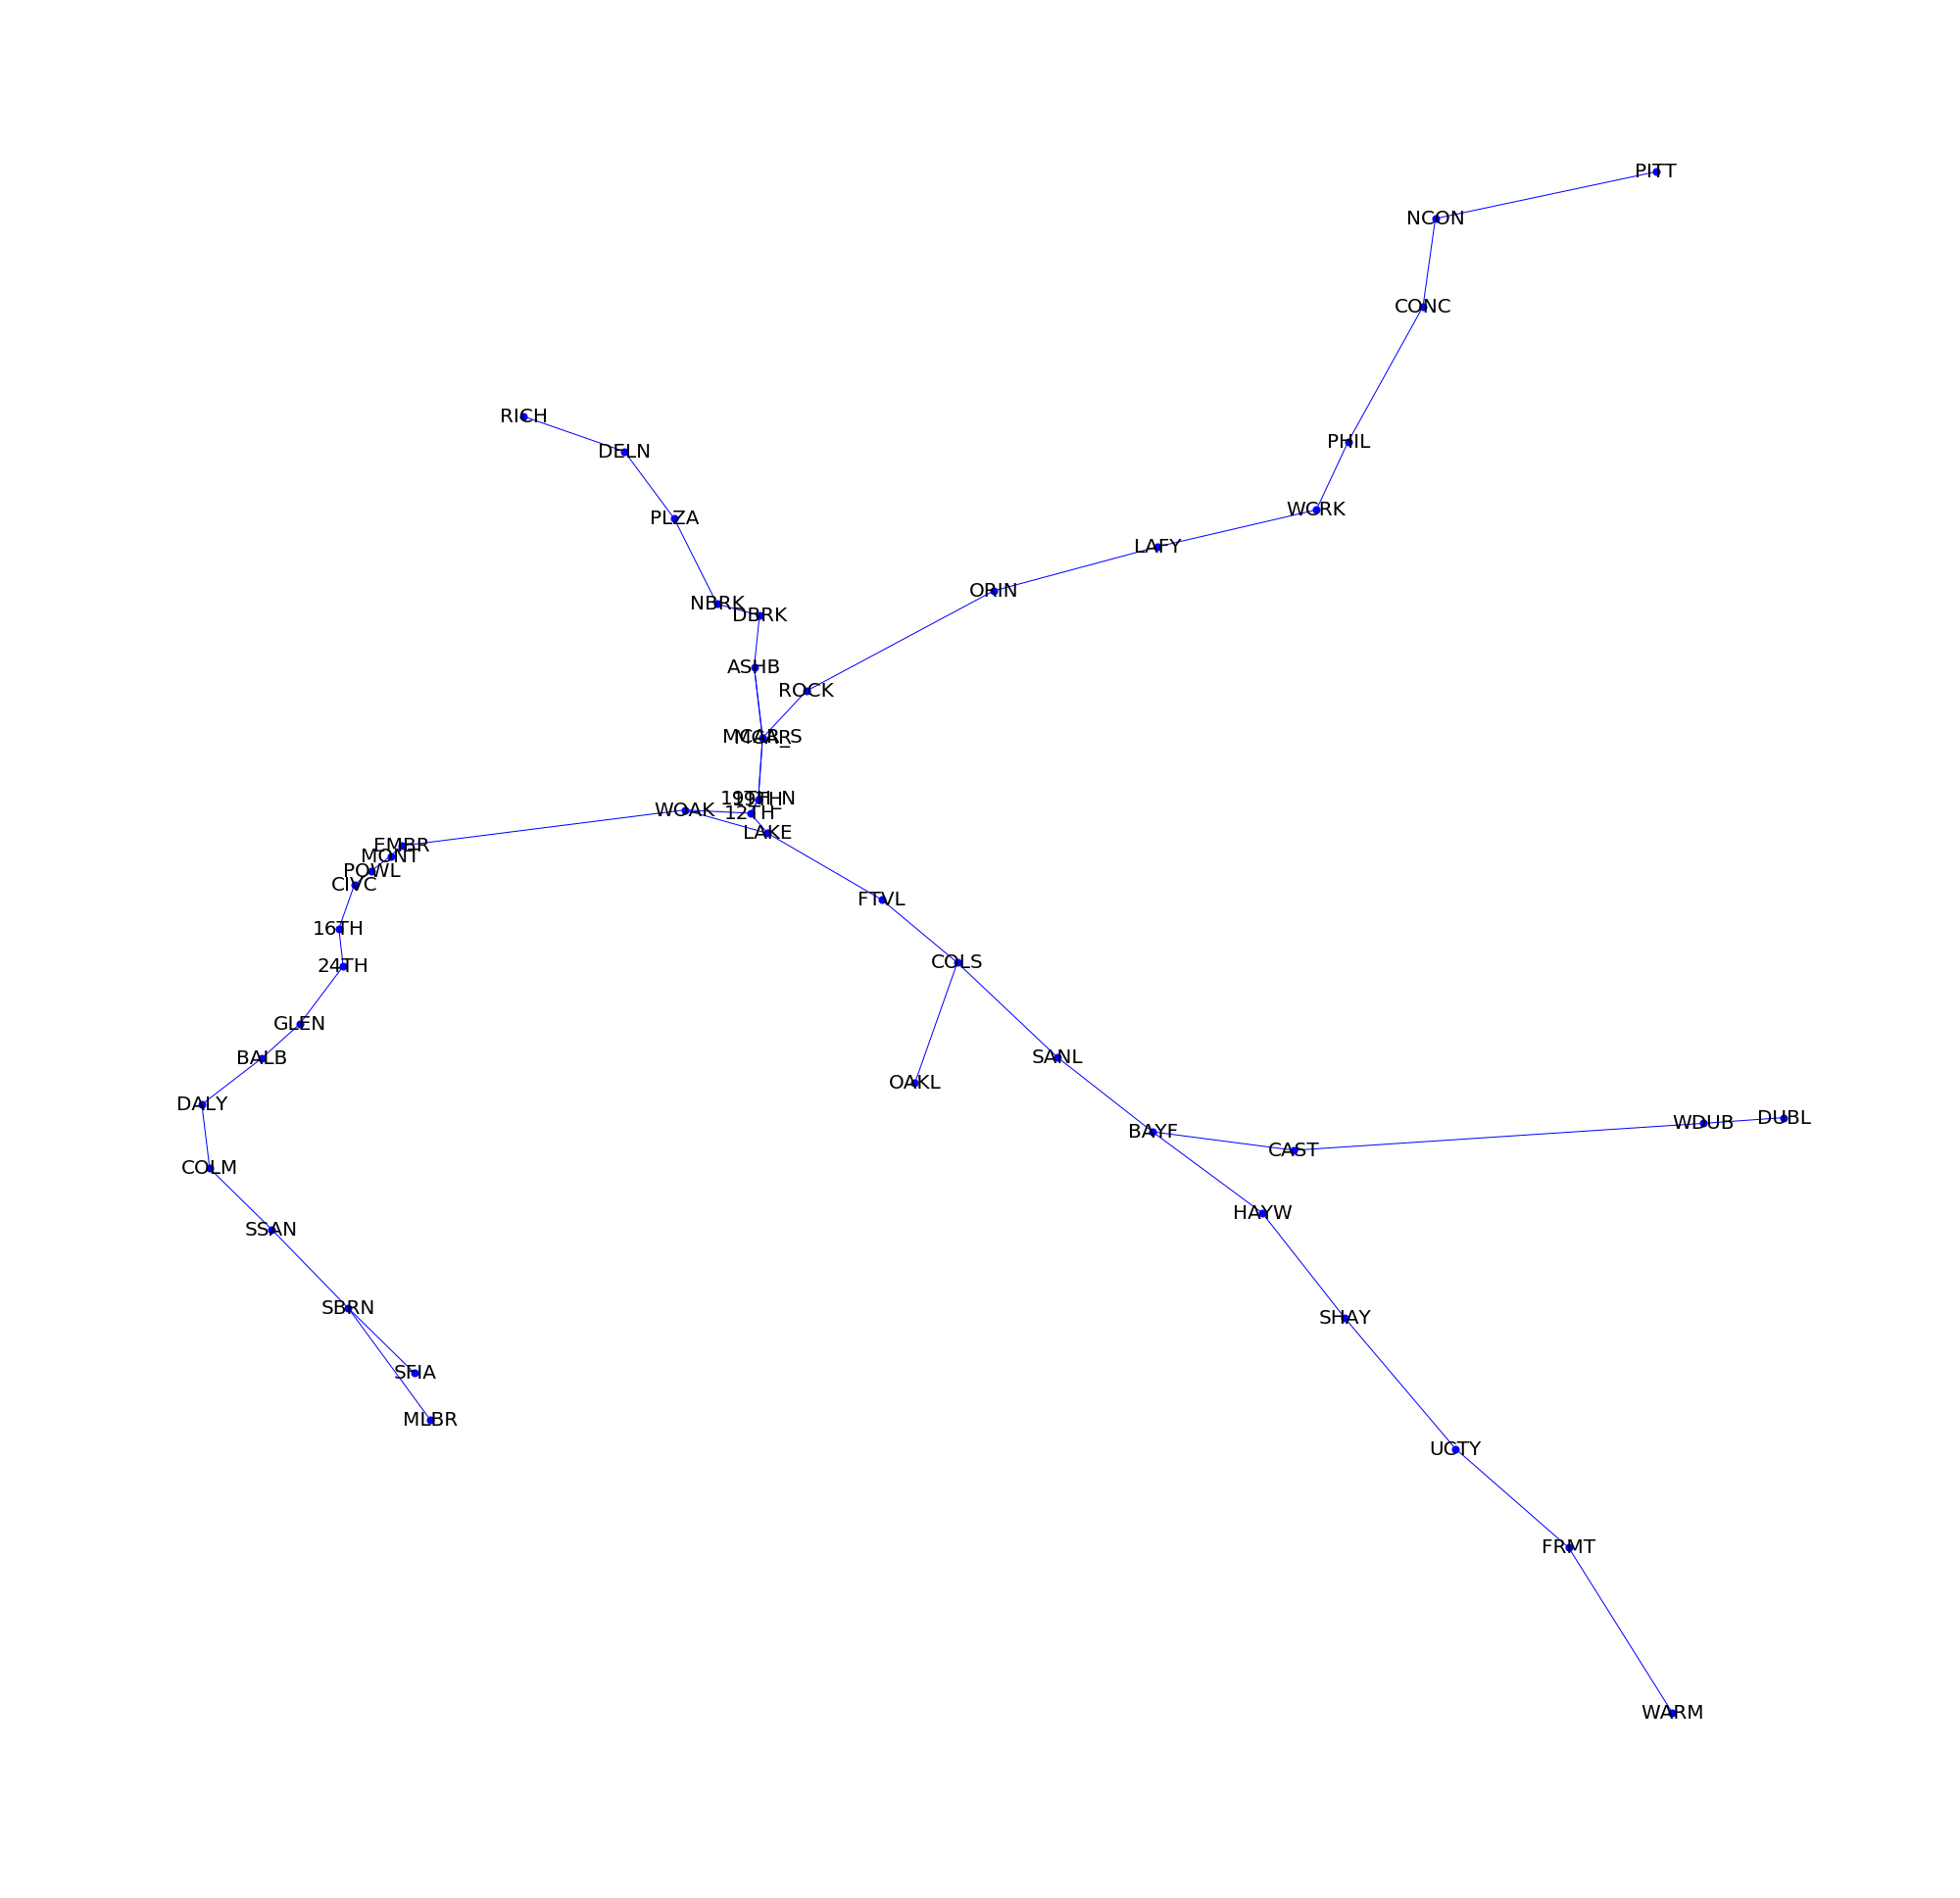

In [282]:
fig = plt.figure()
nx.draw_networkx(G,pos = nodes ,node_size = 50,node_color = 'b',font_size = 20, edge_color='b', style='solid')
plt.axis('off')
fig.set_size_inches(35, 35)
plt.show()
plt.

In [247]:
# Then we could find out, for example, shortest path for any two random stops
nx.shortest_path(G, 'DALY', 'LAKE')

['DALY',
 'BALB',
 'GLEN',
 '24TH',
 '16TH',
 'CIVC',
 'POWL',
 'MONT',
 'EMBR',
 'WOAK',
 'LAKE']

In [248]:
nx.shortest_path(G, 'PLZA', 'ORIN')

['PLZA', 'NBRK', 'DBRK', 'ASHB', 'MCAR_S', 'ROCK', 'ORIN']

In [250]:
# Then we could add some Pagerank into play
pagerank = nx.pagerank_numpy(G)

In [251]:
s = pd.Series(pagerank, name='PageRank')
s.index.name = 'stop_id'
pagerank_table = s.reset_index()

In [283]:
# Then we would like to add the value of this pagerank to the corresponding stop
stops = pd.merge(stops, pagerank_table)
stops.head(20)
# We can also drop some columns to keep the table neat:
# stops.drop(['zone_id', 'stop_url', 'location_type', 'parent_station', 'stop_timezone', 'wheelchair_boarding'], axis = 1, inplace=True)


,stop_id,stop_name,stop_desc,stop_lat,stop_lon,PageRank,hits
0,12TH,12th St. Oakland City Center,NaN,37.803768,-122.271450,0.031970,0.147035
1,16TH,16th St. Mission,NaN,37.765062,-122.419694,0.020635,0.002303
2,19TH,19th St. Oakland,NaN,37.808350,-122.268602,0.017294,0.075465
3,19TH_N,19th St. Oakland,NaN,37.808350,-122.268602,0.017614,0.071460
4,24TH,24th St. Mission,NaN,37.752470,-122.418143,0.020764,0.001041
5,ASHB,Ashby,NaN,37.852803,-122.270062,0.026455,0.044008
6,BALB,Balboa Park,NaN,37.721585,-122.447506,0.020988,0.000213
7,BAYF,Bay Fair,NaN,37.696924,-122.126514,0.029136,0.008679
8,CAST,Castro Valley,NaN,37.690746,-122.075602,0.021230,0.003897
9,CIVC,Civic Center/UN Plaza,NaN,37.779732,-122.414123,0.020435,0.005095


In [260]:
stops.sort_values('PageRank', ascending=False).head(10)

,stop_id,stop_name,stop_desc,stop_lat,stop_lon,PageRank
38,SBRN,San Bruno,NaN,37.637761,-122.416287,0.034278
0,12TH,12th St. Oakland City Center,NaN,37.803768,-122.271450,0.031970
7,BAYF,Bay Fair,NaN,37.696924,-122.126514,0.029136
10,COLS,Coliseum,NaN,37.753661,-122.196869,0.028785
5,ASHB,Ashby,NaN,37.852803,-122.270062,0.026455
26,MCAR_S,MacArthur,NaN,37.829065,-122.267040,0.026030
47,WOAK,West Oakland,NaN,37.804872,-122.295140,0.024745
24,LAKE,Lake Merritt,NaN,37.797027,-122.265180,0.024698
30,NCON,North Concord/Martinez,NaN,38.003193,-122.024653,0.024059
19,FRMT,Fremont,NaN,37.557465,-121.976608,0.023919


NetworkX also implements the HITS algorithm. It was originally designed to differenciate between web pages which acted as hubs of information and those which acted as authoritive sourves of information. It does this by looking at incoming and outgoing edges from each node. In an undirected graph (like we're using), incoming and outgoing edges are the same, but the results I found when I applied it to the Tube graph were quite interesting!

In [268]:
hits = nx.hits_scipy(G, max_iter=1000)[0]
hits_series = pd.Series(hits, name='hits')
hits_series.index.name = 'stop_id'
hits_table = hits_series.reset_index()
hits_table

stops = pd.merge(stops, hits_table)
stops

,stop_id,stop_name,stop_desc,stop_lat,stop_lon,PageRank,hits
0,12TH,12th St. Oakland City Center,NaN,37.803768,-122.271450,0.031970,0.147035
1,16TH,16th St. Mission,NaN,37.765062,-122.419694,0.020635,0.002303
2,19TH,19th St. Oakland,NaN,37.808350,-122.268602,0.017294,0.075465
3,19TH_N,19th St. Oakland,NaN,37.808350,-122.268602,0.017614,0.071460
4,24TH,24th St. Mission,NaN,37.752470,-122.418143,0.020764,0.001041
5,ASHB,Ashby,NaN,37.852803,-122.270062,0.026455,0.044008
6,BALB,Balboa Park,NaN,37.721585,-122.447506,0.020988,0.000213
7,BAYF,Bay Fair,NaN,37.696924,-122.126514,0.029136,0.008679
8,CAST,Castro Valley,NaN,37.690746,-122.075602,0.021230,0.003897
9,CIVC,Civic Center/UN Plaza,NaN,37.779732,-122.414123,0.020435,0.005095


In [271]:
# Sort the stops table descending on hits
stops.sort_values('hits', ascending=False).head(20)

,stop_id,stop_name,stop_desc,stop_lat,stop_lon,PageRank,hits
0,12TH,12th St. Oakland City Center,NaN,37.803768,-122.271450,0.031970,0.147035
24,LAKE,Lake Merritt,NaN,37.797027,-122.265180,0.024698,0.122805
47,WOAK,West Oakland,NaN,37.804872,-122.295140,0.024745,0.121988
2,19TH,19th St. Oakland,NaN,37.808350,-122.268602,0.017294,0.075465
3,19TH_N,19th St. Oakland,NaN,37.808350,-122.268602,0.017614,0.071460
20,FTVL,Fruitvale,NaN,37.774836,-122.224175,0.018278,0.058141
18,EMBR,Embarcadero,NaN,37.792874,-122.397020,0.018421,0.055147
26,MCAR_S,MacArthur,NaN,37.829065,-122.267040,0.026030,0.054011
5,ASHB,Ashby,NaN,37.852803,-122.270062,0.026455,0.044008
25,MCAR,MacArthur,NaN,37.829065,-122.267040,0.018106,0.043342


Where PageRank finds the important stations, the HITS algorithm seems to be pretty good at finding the busy stations, still without any traffic data! Neat!

In [279]:
import colorsys
def pseudocolor(val):
    h = (1.0 - val) * 120 / 360
    r, g, b = colorsys.hsv_to_rgb(h, 1., 1.)
    return r * 255, g * 255, b * 255

In [281]:
normed = stops[['stop_lon', 'stop_lat', 'PageRank']]
normed = normed - normed.min()
normed = normed / normed.max()
locations = dict(zip(stops['stop_id'], normed[['stop_lon', 'stop_lat']].values))
pageranks = dict(zip(stops['stop_id'], normed['PageRank'].values))

p = figure(
    x_range = (.4,.7),
    y_range = (.2,.5),
    height= 700,
    width= 900,
)
for edge in G.edges():
    p.line( 
        x= [locations[pt][0] for pt in edge],
        y= [locations[pt][1] for pt in edge],
    )

for node in G.nodes():
    x = [locations[node][0]]
    y = [locations[node][1]]
    p.circle(
        x, y, 
        radius = .01 * pageranks[node], 
        fill_color = pseudocolor(pageranks[node]), 
        line_alpha=0)
    p.text(
        x, y, 
        text = {'value':node}, 
        text_font_size = str(min(pageranks[node] * 12, 10)) + "pt", 
        text_alpha = pageranks[node],
        text_align='center',
        text_font_style='bold')
    
show(p)